### Carregando bibliotecas

In [1]:
#PREVER TAXA MÉDIA DE OCUPAÇÃO CASAS EM BOSTON EUA

#Carregando dataset
from sklearn.datasets import load_boston
boston = load_boston()

#Carregando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

#retirando warnings
import warnings
warnings.filterwarnings('ignore')

### Pré-processamento

In [2]:
#Extraindo variáveis explanatorias ou features ou caracteristias
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['target'] = boston.target

dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
valor_medio_target = dataset['target'].mean()
valor_medio_target

22.532806324110698

### Calculadon SSE

---



  SSE: Diferença ao quadrado do valor previsto e do valor observado

[]

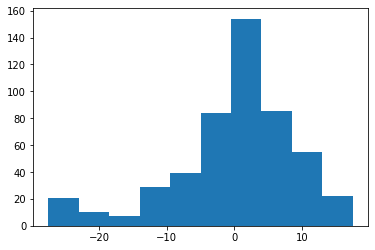

In [4]:
square_erros = pd.Series(valor_medio_target - dataset['target'])
SSE = round((square_erros**2).sum(), 2)
SSE

#HISTOGRAMA

plt.hist(square_erros)
plt.plot()

### Funções estátisticas 
---

In [5]:
#Função para calcular o desvio padrão
def calc_desvio_padrao(variable, bias = 0, round_d = 3):
  observation = float(len(variable))
  return round(np.sqrt(np.sum((variable - np.mean(variable))**2)/(observation - min(bias, 1))), ndigits=round_d)

#Funções para calcular a varianca e a correlação
def covariance(variable_1, variable_2, bias = 0):
  observation = float(len(variable_1))
  return np.sum((variable_1 - np.mean(variable_1)) * (variable_2 - np.mean(variable_2))) / (observation - min(bias, 1))

def standardize(variable_n):
  return (variable_n - np.mean(variable_n)) / np.std(variable_n)

def correlation(var1, var2, bias = 0):
  return covariance(standardize(var1), standardize(var2), bias)


In [6]:
#Comparar os valores obtidos com a biblioteca Scipy
from scipy.stats.stats import pearsonr

print('Nossa estimativa de correlação: {:.3f}'.format(correlation(dataset['RM'], dataset['target'])))
print('calculado a partir da função pearsonr: {:.3f}'.format(pearsonr(dataset['RM'], dataset['target'])[0]))

Nossa estimativa de correlação: 0.695
calculado a partir da função pearsonr: 0.695


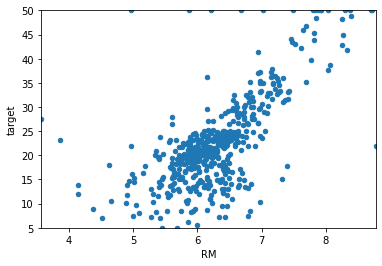

In [37]:
x_range = [dataset['RM'].min(), dataset['RM'].max()]
y_range = [dataset['target'].min(), dataset['target'].max()]

dataset.plot(kind= 'scatter', x = 'RM', y = 'target', xlim = x_range, ylim = y_range)

## Construindo Modelo de Regressão com o StarsModels

In [8]:
import statsmodels.api as sm

In [9]:
y = dataset['target']
X = dataset['RM']

In [10]:
#inserindo coeficientes inicias dos bias 
x = sm.add_constant(X)
x.head()

,const,RM
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147


In [11]:
#criando modelo
modelo = sm.OLS(y,x)

#treinando modelo
modelo_val = modelo.fit()

In [12]:
print(modelo_val.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 03 Jun 2021   Prob (F-statistic):           2.49e-74
Time:                        12:42:26   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.0

Fazendo previsores do modelo

In [ ]:
valores_previstos = modelo_val.predict(x)
valores_previstos

In [14]:
RM = 5
x_teste = np.array([1, RM], dtype=np.float32)
print('se o RM for {} o valor da taxa de ocupação prevista é  {:.4f}'.format(RM,float(modelo_val.predict(x_teste))))

se o RM for 5 o valor da taxa de ocupação prevista é  10.8399


### Grafico de dispersão

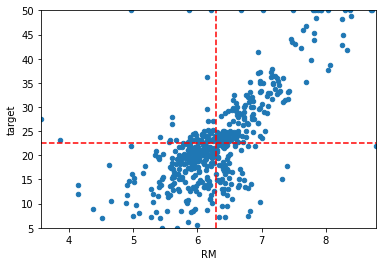

In [40]:
scatter_plot = dataset.plot(kind= 'scatter', x = 'RM', y = 'target', xlim = x_range, ylim = y_range)

#linhas médias 
meanX = scatter_plot.plot(x_range, [dataset['target'].mean(), dataset['target'].mean()], '--', color = 'red')
meanY = scatter_plot.plot([dataset['RM'].mean(), dataset['RM'].mean()], y_range, '--', COLOR='red')

### Gráfico de regressão

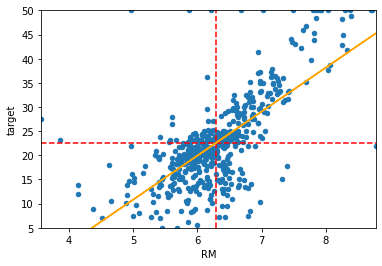

In [39]:
#primeira camada do Scatter Plot
scatter_plot = dataset.plot(kind= 'scatter', x = 'RM', y = 'target', xlim = x_range, ylim = y_range)

#segunda camada do Scatter Plot (médias)
meanX = scatter_plot.plot(x_range, [dataset['target'].mean(), dataset['target'].mean()], '--', color = 'red')
meanY = scatter_plot.plot([dataset['RM'].mean(), dataset['RM'].mean()], y_range, '--', COLOR='red')

#terceira camada Scatter Plot (linha de regressão)
regression_line = scatter_plot.plot(dataset['RM'], valores_previstos, '-', color='orange')

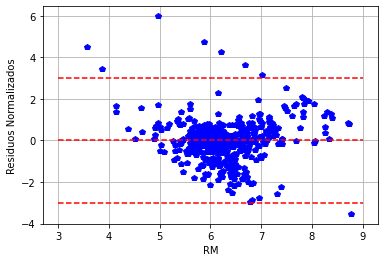

In [66]:
#gerando residuos 
residuos = dataset['target'] - valores_previstos
residuos_normalizados = standardize(residuos)


#graficos dos residuos 
residuos_scatter_plot = plt.plot(dataset['RM'], residuos_normalizados, 'bp')
plt.xlabel('RM')
plt.ylabel('Residuos Normalizados')

mean_residual = plt.plot([int(x_range[0]), round(x_range[1], 0)], [0,0], '--', color = 'red')
upper_bound = plt.plot([int(x_range[0]), round(x_range[1], 0)], [3,3], '--', color = 'red')
lower_bound = plt.plot([int(x_range[0]), round(x_range[1], 0)], [-3,-3], '--', color = 'red')
plt.grid()

##Construindo Modelo de Regressão com o Scikit-Learn

In [67]:
from sklearn import linear_model

In [68]:
#cria objeto 
modelo_v2 = linear_model.LinearRegression(normalize=False, fit_intercept=True)

In [72]:
#definir os valores de x e y
num_observ = len(dataset)

X = dataset['RM'].values.reshape((num_observ, 1 )) #dados devem estar na forma de matriz
y = dataset['target'].values #y pode ser em vetor 

In [ ]:
modelo_v2.fit(X,y)

print(modelo_v2.coef_)
print(modelo_v2.intercept_)

valores_previstos_sl = modelo_v2.predict(X)

In [87]:
RM = 5
Xp = np.array(RM)
Xp = Xp.reshape(-1, 1)

print('valor previsto {:.2f}'.format(float(modelo_v2.predict(Xp))))

valor previsto 10.84
